# Ablate fusion/fission and see what happens

This is with a more realistic model for the genetic process $w_s \rightarrow 2 w_f$. 

Compare to data of Song et al. 2015 at a qualitative level


In [17]:
import numpy as np
from pdb import set_trace
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
import mitonetworks.det as mt

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
mt.reset_plots()

In [6]:
kd_factor = np.linspace(0.1,1,10)

In [38]:
def sweep_ss_fus_fis(kd_factor, params_nominal, steady_state_fcn):
    x_nom = steady_state_fcn(0,params_nominal) # find steady state when ms = 0 (check this is the independent variable) 
    if np.any(x_nom<0):
        raise Exception("Nominal x has negative values")
    
    n_relative_red_fis_array = []
    fs_relative_red_fis_array = []
    for i, kd in enumerate(kd_factor):
        params_reduce_fission = deepcopy(params_nominal)
        params_reduce_fission['beta'] = params_nominal['beta']*kd # knock down the fission parameter
        x_r_fis = steady_state_fcn(0,params_reduce_fission) # compute steady state
        x_r_fis = np.array(x_r_fis)
        if np.any(x_r_fis < 0): # check all positive
            x_r_fis = np.nan*np.zeros(len(x_r_fis))

        n_r_fis_normed = np.sum(x_r_fis)/np.sum(x_nom) # relative copy number
        fs_r_fis_normed = (x_r_fis[0]/np.sum(x_r_fis))/(x_nom[0]/np.sum(x_nom)) # relative fraction singletons

        n_relative_red_fis_array.append(n_r_fis_normed)
        fs_relative_red_fis_array.append(fs_r_fis_normed)

    n_relative_red_fus_array = []
    fs_relative_red_fus_array = []
    for i, kd in enumerate(kd_factor):
        params_reduce_fusion = deepcopy(params_nominal)
        params_reduce_fusion['gamma'] = params_nominal['gamma']*kd
        x_r_fus = steady_state_fcn(0,params_reduce_fusion) # compute steady state        
        x_r_fus = np.array(x_r_fus)
        if np.any(x_r_fus < 0):
            x_r_fus = np.nan*np.zeros(len(x_r_fus))

        n_r_fus_normed = np.sum(x_r_fus)/np.sum(x_nom) # relative copy number
        fs_r_fus_normed = (x_r_fus[0]/np.sum(x_r_fus))/(x_nom[0]/np.sum(x_nom)) # relative fraction singletons

        n_relative_red_fus_array.append(n_r_fus_normed)
        fs_relative_red_fus_array.append(fs_r_fus_normed)

    return n_relative_red_fis_array, fs_relative_red_fis_array, n_relative_red_fus_array, fs_relative_red_fus_array
    

In [26]:
params_nominal = {
    'beta':33.12, 
    'gamma':0.03785142857142858,
    'b':1.2416523075924095e-05, 
    'kappa':11.662903457629223,
    'mu':0.023, 
    'xi':0.0, 
    'delta':1.0
}
n_rel_red_fis_E, fs_rel_red_fis_E, n_rel_red_fus_E, fs_rel_red_fus_E = sweep_ss_fus_fis(kd_factor, params_nominal,  mt.E_linear_feedback_control_ss)

In [39]:
params_nominal = {
    'xi' : 0.0,
    'gamma' : 0.03785142857142858,
    'beta' : 33.120000000000005,
    'kappa' : 1000.0,#0.0,
    'b' : 1e-4,
    'mu' : 0.023,
    'delta' : 1.0,
}

n_rel_red_fis_Y, fs_rel_red_fis_Y, n_rel_red_fus_Y, fs_rel_red_fus_Y = sweep_ss_fus_fis(kd_factor, params_nominal,  mt.Y_linear_feedback_deg_ss)

## Plot

In [28]:
song_1 = [1./3, 0.4/0.6]
song_2 = [2.0, 1.0]

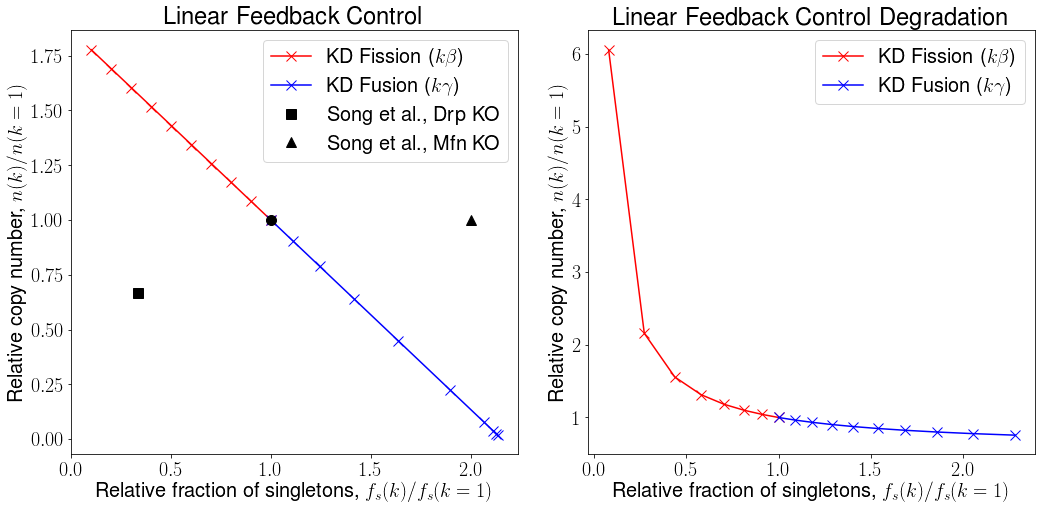

In [43]:
fig, axs = plt.subplots(1,2, figsize=(2*7.5,7.5))
axs = axs.ravel()

ax = axs[0]
ax.plot(fs_rel_red_fis_E,n_rel_red_fis_E,'-xr',label=r"KD Fission ($k \beta$)")
ax.plot(fs_rel_red_fus_E,n_rel_red_fus_E,'-xb',label=r"KD Fusion ($k \gamma$)")
ax.plot(song_1[0],song_1[1],'ks',label=r"Song et al., Drp KO")
ax.plot(song_2[0],song_2[1],'k^',label=r"Song et al., Mfn KO")
ax.plot(1.0,1.0,'ko')
ax.legend()
ax.set_xlabel('Relative fraction of singletons, $f_s(k)/f_s(k=1)$')
ax.set_ylabel('Relative copy number, $n(k)/n(k=1)$')
ax.set_title('Linear Feedback Control')

ax = axs[1]
ax.plot(fs_rel_red_fis_Y,n_rel_red_fis_Y,'-xr',label=r"KD Fission ($k \beta$)")
ax.plot(fs_rel_red_fus_Y,n_rel_red_fus_Y,'-xb',label=r"KD Fusion ($k \gamma$)")
# ax.plot(song_1[0],song_1[1],'ks',label=r"Song et al., Drp KO")
# ax.plot(song_2[0],song_2[1],'k^',label=r"Song et al., Mfn KO")
ax.legend()
ax.set_xlabel('Relative fraction of singletons, $f_s(k)/f_s(k=1)$')
ax.set_ylabel('Relative copy number, $n(k)/n(k=1)$')
ax.set_title('Linear Feedback Control Degradation')

plt.tight_layout()
plt.savefig('kd_fus_fis.png')

Song _et al._ 2015 Cell Metabolism,
- If $f_s$ reduces, mito mass reduces and mitophagy increases
- If $f_s$ increases, mito mass doesn't change, mitophagy doesn't change

This seems to contrdict what we find with our model. Why?